# <span id="toc">  Esercitazione 7 - Monte Carlo - NVT </span>

[  Ensemble canonico NVT ](#ex-7.0)

[  7.1 - Tail corrections ](#ex-7.1)

&nbsp;&nbsp;  [  Equilibrazione  ](#ex-7.1.0)

[  7.2 - Autocorrelazione ed incertezze statistiche  ](#ex-7.2)

[  7.3 - Radial Distribution Function $g(r)$  ](#ex-7.3)

[  7.4 - Simulazioni con modello di Lennard-Jones  ](#ex-7.4)


### <span id="ex-7.0">  Ensemble canonico - NVT </span>[^](#toc)

In questa esercitazione devo eseguire simulazioni su un **ensemble canonico**, in stato solido, liquido e gassoso, a rispettive diverse temperature, secondo gli stessi parametri dell'[esercitazione 4](#https://github.com/martinozanetti/LSN-Martino-Zanetti/blob/master/04-ok/my-04.ipynb). 

Dal punto di vista macroscopico questo ensemble rappresenta i possibili stati di un sistema la cui **temperatura $T$ è fissata**, il quale perciò deve essere a contatto con un bagno termico di capacità infinita (a temperatura $T$), col quale può **scambiare energia**: da qui il nome NVT, a indicare che numero di particelle, volume e temperatura sono costanti. 

Dal punto di vista microscopico l'ensemble canonico è invece definito dalla seguente probabilità associata a ciascun microstato:
$$
P=\frac{e^{-E/(k_BT)}}{Z} \qquad \qquad \text{con} \quad Z= e^{-F/(k_BT)}
$$
dove $F$ è l'energia libera di Helmholtz.

## <span id="ex-7.1">  Esercizio 7.1 </span>[^](#toc)

Nell'[esercitazione 4](#https://github.com/martinozanetti/LSN-Martino-Zanetti/blob/master/04-ok/my-04.ipynb), parlando di raggio di cutoff, ho accennato alla necessità di correggere l'approssimazione fatta tramite *tail corrections* di energia potenziale e pressione.

Si può dimostrare che per un potenziale di Lennard-Jones queste correzioni valgono rispettivamente:
$$
\frac{\langle U \rangle _{tail}}{N}   = \frac{8\pi\rho\epsilon}{9 r_c^9} - \frac{8\pi\rho\epsilon}{3 r_c^3}
\qquad \qquad \frac{\langle W \rangle _{tail}}{3N\epsilon}   = 32\pi\rho        \left[            \frac{1}{9 r_c^9}           - \frac{1}{6 r_c^3}        \right]
$$
dove $\rho$ e $r_c$ sono in unità di $\sigma_{LJ}$. Come nell'esercitazione 4, usiamo $\sigma=\epsilon = 1$ .

In questa esercitazione ho incluso queste correzioni per le stime di energia potenziale e pressione. 

L'algoritmo che muove ogni passo è di tipo Metropolis.

### <span id="ex-7.1.0">  Equilibrazione </span>[^](#toc)

Iniziando dall configurazione a cristallo fcc, equilibrio con le temperature corrette.

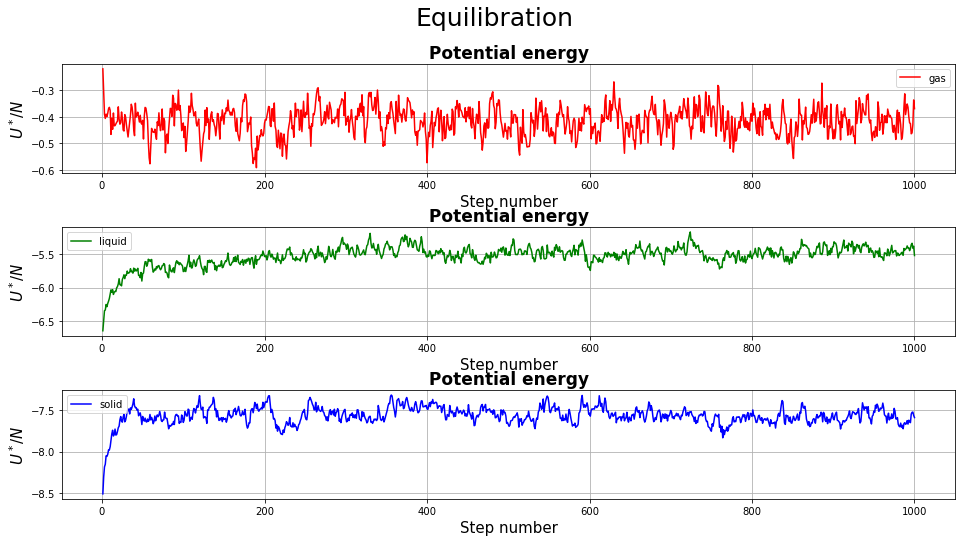

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

npart = 108

N = 1000
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

phase = ["gas", "liquid", "solid"]
phase_z = ["gas-zoom", "liquid-zoom", "solid-zoom"]
colors = ["r","g","b"]
k=0

plt.figure(figsize=(16,8))
plt.suptitle("Equilibration", fontsize = 25)

for i in range(0,3):
    plt.subplot(3,1,i+1)
    U = np.loadtxt("ex7-MDNVE_MCNVT/eq/"+phase[i]+"/output_epot.dat", usecols=(1), delimiter=' ', unpack='true')
    plt.plot(x, U, marker='', label=phase[i], color = colors[i])
    plt.title('Potential energy', fontsize = 17, fontweight = "bold")
    plt.ylabel('$U^*/N$', fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.grid(True)
    plt.legend()
    plt.subplots_adjust(hspace=0.5)


plt.show()



## <span id="ex-7.2">  Esercizio 7.2 - Autocorrelazione ed incertezze statistiche </span>[^](#toc)

Per questa sezione ho salvato direttamente $500\,000$ stime ($5\cdot10^5$ blocchi da un passo) di energia potenziale $U/N$ dalla simulazione MC-NVT, utilizzando gli stessi parametri dell'esercitazione 4:

1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

L'*acceptance ratio* è stato settato a circa $50\%$ usando le seguenti rispettive ampiezze di passo: 0.11 (solid), 0.2 (liquid), 5 (gas).


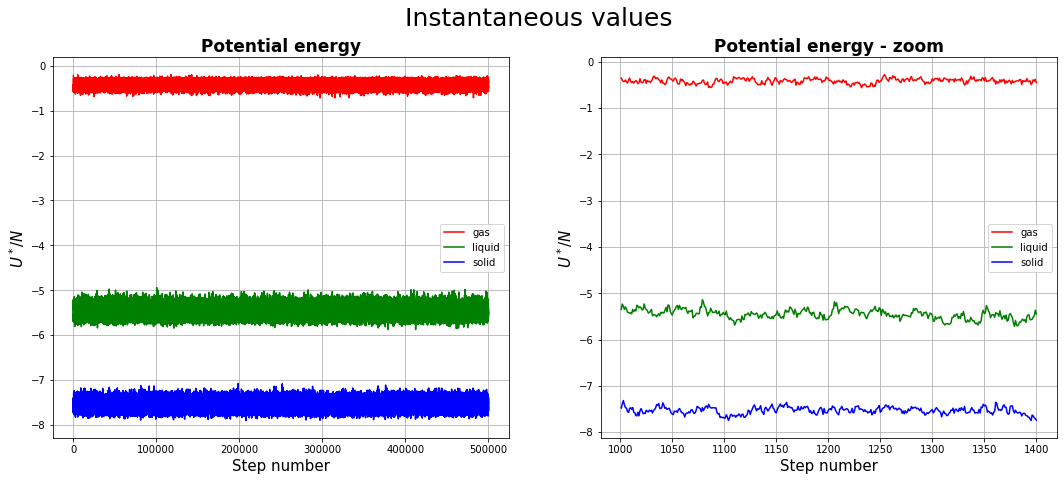

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

npart = 108

N = 500000
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

phase = ["gas", "liquid", "solid"]
phase_z = ["gas-zoom", "liquid-zoom", "solid-zoom"]
colors = ["r","g","b"]

U_g = U_l = U_s = []
U = [U_g, U_l, U_s]

plt.figure(figsize=(18,7))
plt.suptitle("Instantaneous values", fontsize = 25)

plt.subplot(1,2,1)
for i in range(0,3):
    U[i] = np.loadtxt("ex7-MDNVE_MCNVT/SAVED/"+phase[i]+"/output_epot.dat", usecols=(1), delimiter=' ', unpack='true')
    plt.plot(x, U[i], marker='', label=phase[i], color = colors[i])
    plt.title('Potential energy', fontsize = 17, fontweight = "bold")
    plt.ylabel('$U^*/N$', fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.grid(True)
    plt.legend()

plt.subplot(1,2,2)
for i in range(0,3):
    plt.plot(x[1000:1400], U[i][1000:1400], marker='', label=phase[i], color = colors[i])
    plt.title('Potential energy - zoom', fontsize = 17, fontweight = "bold")
    plt.ylabel('$U^*/N$', fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.grid(True)
    plt.legend()
    
plt.show()

## Autocorrelazione

Dai grafici precedenti si vede che misure successive di $U/N$ sono tra loro correlate. Per realizzare efficacemente il data blocking, ho bisogno di stimare il "tempo" $\tau$ (in unità di step MC) di autocorrelazione, e porre il numero di step per blocco $\gg \tau$. Per farlo, ho utilizzato le $500\,000$ estrazioni del paragrafo precedente, analizzandole nel seguente specchietto in python. La legge che descrive l'autocorrelazione in funzione del numero di step è:
$$
\chi(t) = \frac
    {
        \frac{1}{t_{max}-t}
            \sum_0^{t_{max}-t} m(t')m(t'+t)
        -\frac{1}{t_{max}-t}
            \sum_0^{t_{max}-t} m(t')
         \times
         \frac{1}{t_{max}-t}
            \sum_0^{t_{max}-t} m(t'+t)
    }
    {
        \frac{1}{t_{max}}
            \sum_0^{t_{max}} m^2(t')
        -\left(
            \frac{1}{t_{max}}
                \sum_0^{t_{max}} m(t')
        \right)^2
    }
$$

Ci aspettiamo un andamento esponenziale che in circa 100 passi è decaduto.



tau (nth of 200) - gas: 
0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 
tau (nth of 200) - liquid: 
0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 
tau (nth of 200) - solid: 
0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 

<function matplotlib.pyplot.show(close=None, block=None)>

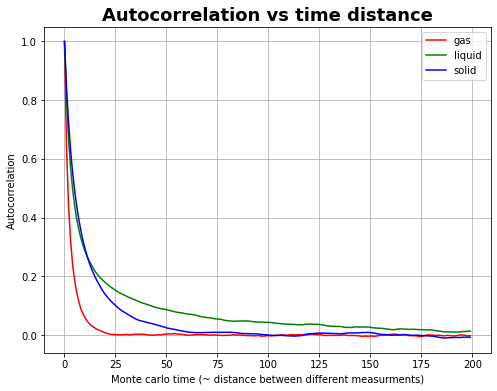

In [3]:
tmax = N
taumax = 200

plt.figure(figsize=(8,6))

for i in range(0,3):

    chi = []

    print("\ntau (nth of "+str(taumax)+") - "+phase[i]+": ")
    for tau in range(taumax):
        s1=0
        s2=0
        s3=0
        s4=0
        s5=0

        # autocorrelation: see lect.6, p.31
        for tp in range(tmax-tau):
            s1 += U[i][tp]*U[i][tp+tau]
            s2 += U[i][tp]
            s3 += U[i][tp+tau]

        for tp in range(tmax):
            s4 += U[i][tp]*U[i][tp]
            s5 += U[i][tp]

        fatt = 1/(tmax-tau)
        fatt2 = 1/tmax

        num = fatt*s1-fatt*s2*fatt*s3
        den = fatt2*s4 - (fatt2*s5)*(fatt2*s5)

        chi.append(num/den)

        if tau%10==0:
            print(tau, end= ", ")

    plt.plot(chi, color = colors[i], label = phase[i])
    plt.xlabel("Monte carlo time (~ distance between different measurments)")
    plt.ylabel("Autocorrelation")
    plt.legend()
    plt.grid()

plt.title("Autocorrelation vs time distance", fontsize = 18, fontweight = "bold")
plt.show

# take in count about 15 minutes to run(!)


In tutti e tre i casi i tempi di decadimento sono inferiori a 25 step MC.

Se dati adiacenti sono correlati, l'incertezza statistica calcolata su di essi (come STD) viene sottostimata. In particolare, pensando al data blocking, finchè un blocco è piccolo rispetto alla distanza di autocorrelazione tra misure successive, l'incertezza statistica calcolata al suo interno verrà sottostimata.

Per graficare l'andamento dell'incertezza statistica sulla stima finale di $U/N$ in funzione della dimensione dei blocchi uso ancora una volta i dati di prima, coprendo un range da $L=M/N=10$ a $L=5\times 10^3$, dove $N$ è il numero di blocchi, $L$ la dimensione del blocco ed $M$ il numero totale di step.
La formula utilizzata nel seguente specchietto python per la stima dell'incertezza statistica è la seguente:
$$
\sigma_{\langle g \rangle}
    = \sqrt{
        \frac{1}{N-1}
        \left[
            \frac{1}{N} \sum_1^N g_i^2 - \left( \sum_1^N g_i\right)^2
        \right]
    }
$$

<!---(v. slide 36, 37, 38, 39, lez.6)--->

<!---Tipicamente questo studio si fa per capire da che punto in poi l'incertezza statistica è calcolata in modo accurato: blocchi piccoli sottostimano l'incertezza statistica; quando essa satura, so che il blocco è abbastanza grande da aver "annullato" le correlazioni.--->


L (of 5000) - gas: 
500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 
L (of 5000) - liquid: 
500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 
L (of 5000) - solid: 
500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 

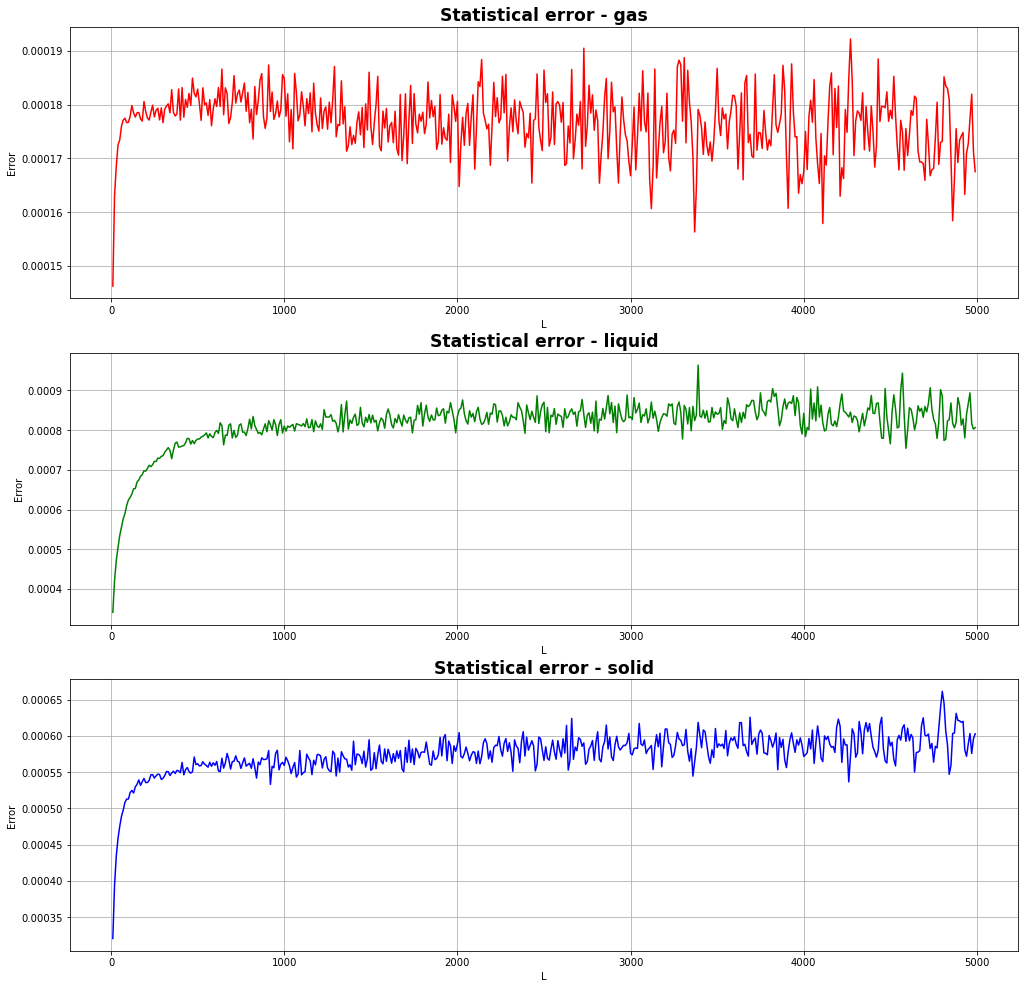

In [4]:
# ============= functions ================= #
def Error(ave, ave2, n):
    if(n==0): 
        return 0
    return np.sqrt((ave2-ave**2)/n)

def dataBlocking(x, N, L):
    mean=0
    mean2=0
    error=0
    for n in range(N):
        mean_block=0
        for l in range(L):
            mean_block+=x[l+n*L]
        mean_block/=L
        mean=(mean*n+mean_block)/(n+1)
        mean2=(mean2*n+mean_block**2)/(n+1)
        error=Error(mean, mean2,n)
    return error
# ========================================== #

L_m=10
L_M=5000
M=500000

fig=plt.figure(figsize=(17, 17))

for i in range(0,3):
    plt.subplot(3,1,i+1)
    plt.title("Statistical error - "+phase[i], size='xx-large', weight='bold')

    y=U[i] # data loaded in 7.1
    error=[]
    x=[]

    L_range = range(10,5000, 10)

    print("\nL (of "+str(L_M)+") - "+phase[i]+": ")
    for L in L_range: 
        if L%500==0:
            print(L, end = ", ")
        N=int(M/L)
        err=dataBlocking(y,N,L)
        error.append(err)
        x.append(L)

    plt.plot(x, error, label = phase[i], color = colors[i])
        
    plt.ylabel("Error")
    plt.xlabel('L')
    #plt.xscale("log")
    plt.grid(True)
        
plt.show()

# take in coutn approx 5 minutes run

Come previsto, si osserva che dopo una lunghezza di dirca $1000-2000$ step per blocco, le incertezze statistiche non sono più sistematicamente sottostimate e oscillano grossomodo attorno a un valore costante.

## <span id="ex-7.3">  Esercizio 7.3 - Radial Distribution Function </span>[^](#toc)

Visti i risultati della parte precedente, scelgo di impostare le simulazioni con $50$ blocchi da $2000$ passi.

Nel seguito ho incluso nel codice il calcolo della Funzione di Distribuzione Radiale $g(r)$ (nel codice: `gdr`) nell'intervallo $r \in \left[ 0; L/2\right]$, dove $r$ è la distanza tra coppie di particelle.

La $g(r)$ descrive la probabilità di trovare una particella a distanza $r$ da una particella di riferimento. L'espressione analitica della $g(r)$ è:
$$
g(r) =\frac{1}{\rho N\Delta V(r)} 
    \left\langle \sum_{i=1}^N \sum_{j=1,\neq i}^N \delta(r-|\vec r_i-\vec r_j |) \right\rangle
$$
dove $\Delta V(r) = \frac{4\pi}{3}\left[(r+dr)^3-r^3\right]$ è il volume di un guscio sferico in cui viene cercata la particella.

All'interno del codice ho stimato $g(r)$ dividendo l'intervallo suddetto in $100$ sottointervalli (perciò $dr = L/200$), e ciclando sulle coppie di particelle: ogni volta che la distanza corrisponde al bin i-esimo ho incrementato il bin di 2, per considerare entrambe le particelle. La normalizzazione è applicata solo alla fine del conto.
I dati sono salvati in forma di istogramma di $100$ bin: ho scritto in un file il valore di ciascun bin (media di blocco) per ogni blocco; totale: $100$ colonne per $50$ righe.
La media finale con incertezza statistica è stata calcolata direttamente negli specchietti python.

Di seguito ho riportato un esempio dell'andamento delle $g(r)$ per lo stato solido, liquido e gassoso, e ho voluto mostrare che le barre d'errore ci sono, nonostante non siano visibili ad occhio, tramite il confronto con il caso estremo di blocchi da $50$ passi.

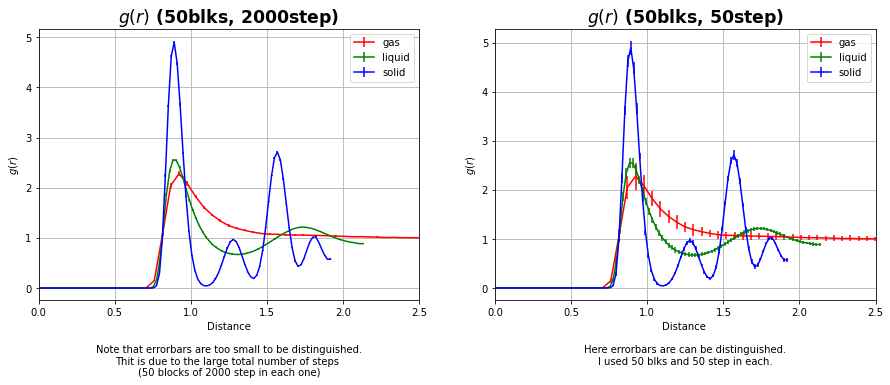

In [43]:
# i have a file with block averages, without errors. In this script i average over them and let python compute the error as std

cap1 = ("\n\nNote that errorbars are too small to be distinguished.\n"
      "Thit is due to the large total number of steps \n"
      "(50 blocks of 2000 step in each one)")
cap2 = ("\n\nHere errorbars are can be distinguished.\n"
      "I used 50 blks and 50 step in each.")
colors = ["r","g","b"]


ng = 100
x=np.arange(0,ng)

# box scaling
rho = [0.05, 0.8, 1.1]
L = [0.0,0.0,0.0]
for i in range(3):
    L[i] = rho[i]**(-1/3)/50

fig=plt.figure(figsize=(15, 5))

for i in range(0,3):

    plt.subplot(1,2,1)
    gdr = np.loadtxt("ex7-MDNVE_MCNVT/MC/"+phase[i]+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
    y = np.mean(gdr, axis=1)
    err = np.std(gdr, axis=1)
    plt.errorbar(x*L[i], y, err, marker='', label=phase[i], color = colors[i])
    plt.title('$g(r)$ (50blks, 2000step)', size='xx-large', weight='bold')
    plt.ylabel('$g(r)$')
    plt.xlabel('Distance'+cap1)
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2.5)

    plt.subplot(1,2,2)
    gdr2 = np.loadtxt("ex7-MDNVE_MCNVT/MC50/"+phase[i]+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
    y2 = np.mean(gdr2, axis=1)
    err2 = np.std(gdr2, axis=1)
    plt.errorbar(x*L[i], y, err2, marker='', label=phase[i], color = colors[i])
    plt.title('$g(r)$ (50blks, 50step)', size='xx-large', weight='bold')
    plt.ylabel('$g(r)$')
    plt.xlabel('Distance '+cap2)
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2.5)


plt.show()



## <span id="ex-7.4">  Esercizio 7.4 - Modello di Lennard-Jones </span>[^](#toc)

Come anticipato, uso il codice aggiornato per simulate simulazioni Monte Carlo di un sistema di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in condizioni canoniche NVT, con potenziale di Lennard-Jones, coi soliti parametri:

1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Di seguito sono riportati i risultati delle medie di blocco con relative incertezze per l'energia potenziale per particella $U^*/N$ e la pressione $p^*$ **in unità di Lennard-Jones**. Ho riportato inoltre le **medie totali** delle $g(r)$ anche per la simulazione MD-NVE. Infine a destra ho aggiunto il plot della differenza tra le due $g(r)$, con relativo errore, calcolato come somma degli errori.

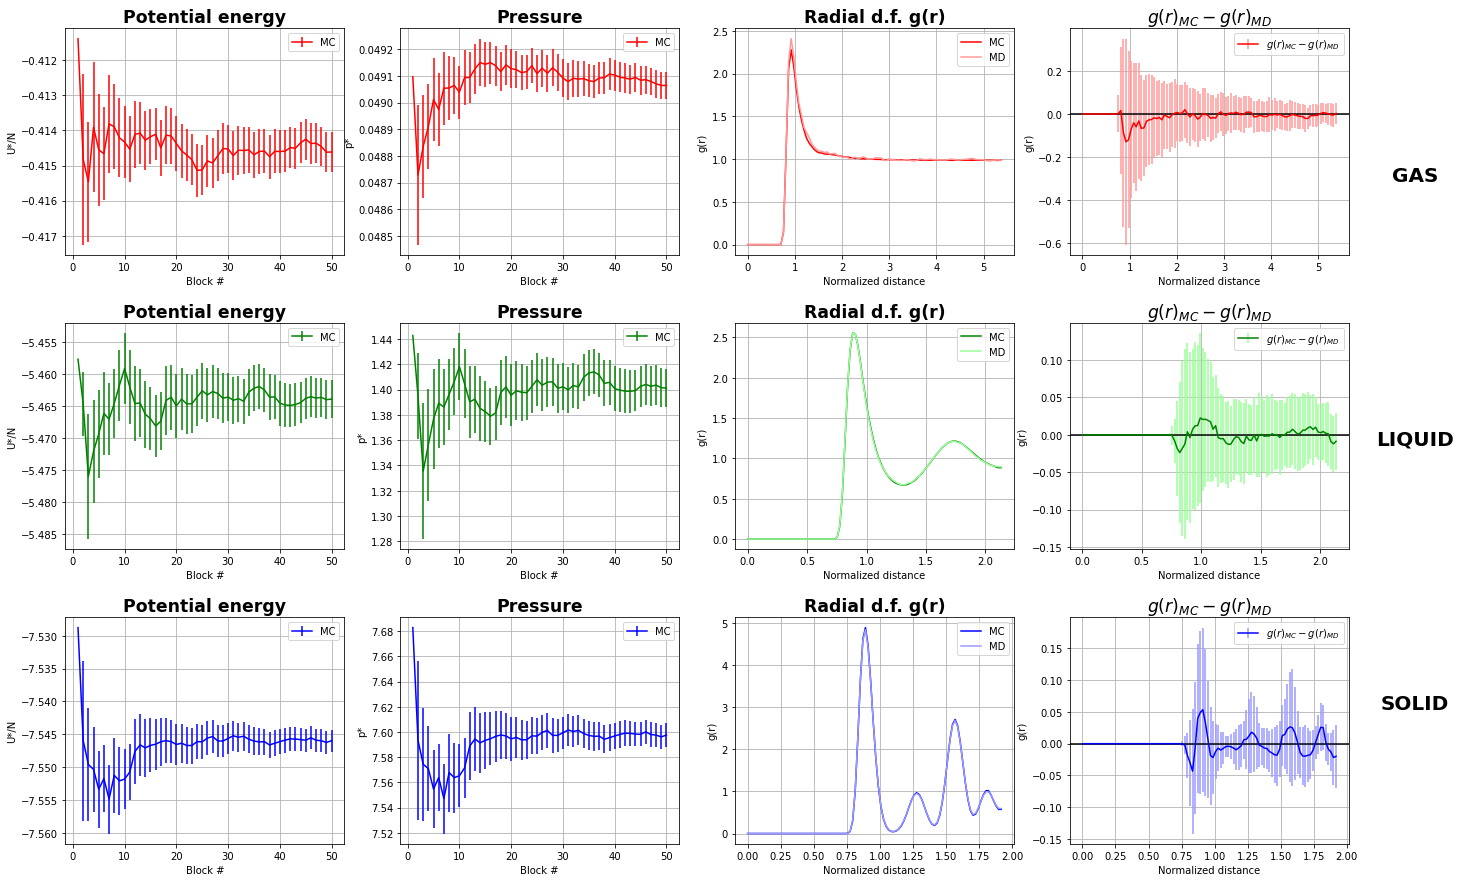

In [40]:
# use 50blks, 2000step

algorithm = ["MC", "MD"]
colors = [["r", [1,0.6,0.6]],["g",[0.6,1,0.6]],["b",[0.6,0.6,1]]]
phase = ["gas", "liquid", "solid"]

thermod_vars = ["epot",             "pres",     "gdr",                 "gdr_diff"               ]
titles       = ["Potential energy", "Pressure", "Radial d.f. g(r)",    "$g(r)_{MC}-g(r)_{MD}$"  ] 
units        = ["U*/N",             "p*",       "g(r)",                "g(r)"                   ]
ascix        = ["Block #",          "Block #",  "Normalized distance", "Normalized distance"    ]

# box scaling
rho = [0.05, 0.8, 1.1]
L = [0.0,0.0,0.0]
for i in range(3):
    L[i] = rho[i]**(-1/3)/50.0

fig=plt.figure(figsize=(23, 15))
plot_index = 0
i = 0 # phase index
j = 0 # th_var index
k = 0 # alg index

ng = 100
x=np.arange(0,ng)

# ciclo sulle fasi
for ph in phase:
    
    
    # ciclo su U/N, p, gdr, gdr_diff
    for td_v in thermod_vars:

        plot_index +=1
        plt.subplot(3,4,plot_index)

        if td_v == "pres" or td_v == "epot":
            x, y , err= np.loadtxt("ex7-MDNVE_MCNVT/MC/"+ph+"/output_"+td_v+".dat", usecols = (0, 2, 3), delimiter = " ", unpack='true')
            # nota: columns (#blk, blk-ave, prog-ave, prog-err)
            plt.errorbar(x, y, err, marker='', label="MC", color = colors[i][0])

        if td_v == "gdr":
            # ciclo su MC/MD
            for alg in algorithm:
                gdr = np.loadtxt("ex7-MDNVE_MCNVT/"+alg+"/"+ph+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
                y = np.mean(gdr, axis=1)
                x=np.arange(0,100)
                plt.plot(x*L[i], y, marker='', label=alg, color = colors[i][k])
                #plt.xlim(0,100)
                k+=1

        if td_v == "gdr_diff":
            # ciclo su MC/MD
            gdrMC = np.loadtxt("ex7-MDNVE_MCNVT/MC/"+ph+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
            gdrMD = np.loadtxt("ex7-MDNVE_MCNVT/MD/"+ph+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
            y = np.mean(gdrMC, axis=1)-np.mean(gdrMD, axis=1)
            err = np.std(gdrMC, axis=1)+np.std(gdrMD, axis=1)
            x=np.arange(0,100)
            plt.errorbar(x*L[i], y, err, marker='', label="$g(r)_{MC}-g(r)_{MD}$", color = colors[i][0], ecolor = colors[i][1])
            #plt.xlim(0,100)
            plt.axhline(y=0, color = "k")

        plt.title(titles[j], size='xx-large', weight='bold')
        plt.ylabel(units[j])
        plt.xlabel(ascix[j])
        plt.grid(True)
        plt.legend()
        k=0
        j+=1
    j=0
    i+=1

txt = ("GAS\n\n\n\n\n\n\n\n\n\n\n\n"
       "LIQUID\n\n\n\n\n\n\n\n\n\n\n\n"
       "SOLID")
fig.text(0.94, 0.25, txt, ha='center', weight="bold", size=20)

plt.subplots_adjust(hspace=0.3)

plt.show()



### Osservazioni

Le $g(r)$ sono magnificamente compatibili tra loro.